# 1. Uploading the Dataset on Google Colab

In [49]:
!pip install gdown

# Replace 'FILE_ID' with the ID from your Google Drive link
!gdown https://drive.google.com/uc?id=1X8jjwy0i07VfAncbPV8Z_V_sMwf4oAPD -O sanad_subset.zip

# Unzip the dataset
!unzip sanad_subset.zip -d dataset


/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
^C
ERROR: Operation cancelled by user
Downloading...
From (original): https://drive.google.com/uc?id=1X8jjwy0i07VfAncbPV8Z_V_sMwf4oAPD
From (redirected): https://drive.google.com/uc?id=1X8jjwy0i07VfAncbPV8Z_V_sMwf4oAPD&confirm=t&uuid=4f9ab58b-a14d-4e8e-ab7d-f3e6a5f78fbf
To: /kaggle/working/sanad_subset.zip
100%|████████████████████████████████████████| 159M/159M [00:01<00:00, 82.5MB/s]
Archive:  sanad_subset.zip
replace dataset/akhbarona/Test/Sports/249396.html? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## Inspecting a few files

### A html file

In [50]:
# Example: Inspect a file from akhbarona/Train/Culture
file_path = '/kaggle/working/dataset/akhbarona/Test/Culture/10013.html'  # Replace with a real file path
with open(file_path, 'r', encoding='utf-8') as f:
    print(f.read())


Title
إلقاء القنينات والأحذية على الشاب بلال في حفل التسامح بأكادير

Body
انتهى  حفل التسامح بأكادير أول أمس بإلقاء القنينات المليئة بالرمال والأحذية  على الشاب بلال، وهو ما يزال على منصة الحفل، فيما تمكن أحد الشبان من جر  خيط الميكروفون حتى انقطع الصوت، وانتهى الحفل بفرار المغني الجزائري من  المنصة.
 
 
 
 
في  البداية كان المئات من الشبان يهتفون باسم بلال وأخرون يهتفون بمغربية  الصحراء، ثم ظهر الفنان الجزائري وأدى مقطعا تحت جذبة كبيرة من الرقص من  قبل عشاقه.
 
 
 
 
 قبل أن تنقلب الأمور، حيث انفلت بعض المعجبين إتباعا من قيد الحراس للرقص مع بلال وحتى معانقته وهو يؤدي بعض الأغاني.
 
 
 
 
وبعد نهاية المقطع الأول، تعالت التحيات، ومن جانبها بدأت القنينات والأحذية تنهال عليه من كل جانب.
 
 
 
 
وبعد استئناف الغناء، انفلت شاب من الجانب الأيسر، ليجر مكبر الصوت حتى انقطع تردده، عندها انسحب بلال مسرعا من الخشبة.
 
 
 
 
و بعد هذه الأحداث خرجت مقدمة الحفل لتهدئة الوضع مخاطبة الجمهور بالفرنسية، فنالت ما ناله المطرب الجزائري.
 
 
 
 
وبعد الذي وقع تجند الحراس والأمن لتفريق مئات المتجمهرين أمام ا

### A txt file

In [51]:
# Example: Inspect a file from arabiya/Train/Finance
file_path = '/kaggle/working/dataset/arabiya/Train/Finance/#العراق-يطلب-من-#صندوق_النقد-مساعدات-عاجلة.txt'  # Replace with a real file path
with open(file_path, 'r', encoding='utf-8') as f:
    print(f.read())


Title
#العراق يطلب من #صندوق_النقد مساعدات عاجلة
Source
الكويت – رويترز
Body
قال وزير المالية العراقي هوشيار زيباري اليوم الثلاثاء إن بغداد تجري حاليا مباحثات مع صندوق النقد الدولي بخصوص تقديم مساعدات عاجلة.   غير أن زيباري أضاف قائلا للصحفيين على هامش الاجتماع السنوي المشترك للهيئات المالية العربية في الكويت "لم يتخذ قرار نهائي بعد."  كان البرلمان العراقي وافق على ميزانية قيمتها 119 تريليون دينار (105 مليارات دولار) لعام 2015 وتتوقع عجزا قدره 25 تريليون دينار في ظل الحرب التي يخوضها العراق ضد مسلحي تنظيم الدولة الإسلامية وهبوط أسعار النفط. ومن المتوقع أن تقوم الحكومة بتمويل العجز من خلال أذون خزانة وسندات حكومية والاقتراض من بنوك محلية. وإضافة لذلك يعتزم العراق سحب أموال من صندوق النقد من خلال حقوق السحب الخاصة المخصصة له وسيستحدث ضريبة على السيارات المستوردة وبطاقات تشغيل الهاتف المحمول والإنترنت.



# Data preprocessing

## Combining the data

In [52]:
import os
import pandas as pd
from bs4 import BeautifulSoup  # For parsing HTML files

def extract_text_from_html(file_path):
    """Extracts text content from an HTML file."""
    with open(file_path, "r", encoding="utf-8") as f:
        soup = BeautifulSoup(f, "html.parser")
        return soup.get_text(strip=True)

def extract_text_from_txt(file_path):
    """Extracts text content from a TXT file."""
    with open(file_path, "r", encoding="utf-8") as f:
        return f.read().strip()

def load_data(source_dir):
    """Loads text files from a dataset directory and assigns labels based on subfolder names."""
    data = []
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            file_path = os.path.join(root, file)
            label = os.path.basename(root)  # Use the subfolder name as the label
            if file.endswith(".html"):
                text = extract_text_from_html(file_path)
            elif file.endswith(".txt"):
                text = extract_text_from_txt(file_path)
            else:
                continue  # Skip non-text files
            data.append({"text": text, "label": label})
    return pd.DataFrame(data)


In [53]:
# Define paths
base_path = "/kaggle/working/dataset"
akhbarona_train = load_data(os.path.join(base_path, "akhbarona/Train"))
akhbarona_test = load_data(os.path.join(base_path, "akhbarona/Test"))

arabiya_train = load_data(os.path.join(base_path, "arabiya/Train"))
arabiya_test = load_data(os.path.join(base_path, "arabiya/Test"))

khaleej_train = load_data(os.path.join(base_path, "khaleej/Train"))
khaleej_test = load_data(os.path.join(base_path, "khaleej/Test"))

# Combine datasets
train_data = pd.concat([akhbarona_train, arabiya_train, khaleej_train], ignore_index=True)
test_data = pd.concat([akhbarona_test, arabiya_test, khaleej_test], ignore_index=True)

# Check the data
print("Train data size:", train_data.shape)
print("Test data size:", test_data.shape)
print(train_data.head())


Train data size: (96354, 2)
Test data size: (10696, 2)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [7]:
print(train_data.info())  # Check column names and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96354 entries, 0 to 96353
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    96354 non-null  object
 1   label   96354 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB
None


In [54]:
print(train_data.isnull().sum())  # Check for null values


text     0
label    0
dtype: int64


In [55]:
print(train_data["text"].head(10))  # Preview the first 10 rows of the text



0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [56]:
print(train_data["label"].value_counts())  # Count occurrences of each label
print(test_data["label"].value_counts())


label
Finance     15210
Tech        15210
Politics    15210
Sports      15210
Medical     15210
Culture     11880
Religion     8424
Name: count, dtype: int64
label
Finance     1690
Tech        1690
Politics    1690
Sports      1690
Medical     1690
Culture     1320
Religion     926
Name: count, dtype: int64


## Cleaning the metadata in the text column and integrating normalization

In [58]:
import re

def clean_and_normalize(text):
    """Removes metadata and normalizes Arabic text."""
    text = text.replace("Title\n", "").strip()  # Remove "Title\n"
    text = text.replace("\n\nBody\n", " ")  # Replace "Body" separator
    text = re.sub(r"[^\u0600-\u06FF\s]", "", text)  # Remove non-Arabic characters
    text = re.sub(r"[إأآا]", "ا", text)  # Normalize Alif
    text = re.sub(r"ة", "ه", text)  # Normalize Ta Marbuta
    text = re.sub(r"ى", "ي", text)  # Normalize Ya
    text = re.sub(r"[ًٌٍَُِّْ~]", "", text)  # Remove Arabic diacritics
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text


# Apply cleaning
train_data["text"] = train_data["text"].apply(clean_and_normalize)
test_data["text"] = test_data["text"].apply(clean_and_normalize)

# Verify the cleaned text
print(train_data["text"].head())


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [59]:
import pandas as pd

# Modifier les paramètres pour afficher tout le texte
pd.options.display.max_colwidth = None  # Afficher tout le contenu d'une cellule

# Afficher quelques lignes pour vérifier
print(train_data["text"].head(10))


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Encoding the labels

In [60]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
train_data["label"] = label_encoder.fit_transform(train_data["label"])
test_data["label"] = label_encoder.transform(test_data["label"])

# Save the mapping for future reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Convert labels to tensors
import torch
train_labels = torch.tensor(train_data["label"].tolist())
test_labels = torch.tensor(test_data["label"].tolist())


Label Mapping: {'Culture': 0, 'Finance': 1, 'Medical': 2, 'Politics': 3, 'Religion': 4, 'Sports': 5, 'Tech': 6}


## Tokenization with AraBERT

In [14]:
from transformers import AutoTokenizer

# Load AraBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")

# Tokenization function
def tokenize_data(data):
    return tokenizer(
        data["text"].tolist(),
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

# Tokenize the datasets
train_encodings = tokenize_data(train_data)
test_encodings = tokenize_data(test_data)


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [15]:
print(train_encodings.keys())  # Should include 'input_ids', 'attention_mask', etc.
print(train_encodings["input_ids"].shape)  # (num_samples, max_length)


dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
torch.Size([96354, 128])


In [16]:
print("Input IDs:", train_encodings["input_ids"][0])
print("Attention Mask:", train_encodings["attention_mask"][0])

Input IDs: tensor([   33, 17818,   223, 14863, 46632,   289,  8127, 43324,  7214,  6384,
         7952,  5995,  5210,   440,  1793,   309, 26256, 17818,   223, 14863,
        46632,   289,  8127, 43324,  7214,  6384,  7952,  5995,  5210,   440,
         1793,   309, 26256,  1386,   210,  1371,  2881,   223,   312, 17818,
          223, 14863, 46632,   335,  4573,  5356,   195,  8127, 43324,  7214,
         6384,  7952,   731, 24149,   181, 25843,   209,  2642,   210,   599,
        10764,   731, 12334,   556,   223,  1487, 25950,   181,  3139,   210,
        26180, 20210,   289,  1793,  5518, 33914,   297,   223,  2286,  1851,
          210,  8127, 43324,  2185,  1125,   223, 31061,  8146,   195,   289,
         1295,   223,  5210,   440,  1793,   309, 26256,   181,  2144,   223,
          312,  8127, 43324,   181,   335,  4573,   637,   223,  8657,   289,
         1442,  1425,   581,  7214, 25124,   210, 22529,  1025,   223,   181,
         2310,   210,  4474,  2500,   195,   567,   2

# Fine-tuning

## Preparing data for fine-tuning by creating a PyTorch-compatible dataset

In [17]:
from torch.utils.data import Dataset

class TextClassificationDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

train_dataset = TextClassificationDataset(train_encodings, train_labels)
test_dataset = TextClassificationDataset(test_encodings, test_labels)


## Fine-tuning AraBERT

In [21]:
import os

# Disable Weights & Biases logging to avoid any unnecessary integration
os.environ["WANDB_DISABLED"] = "true"

from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load AraBERT pre-trained model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained(
    "aubmindlab/bert-base-arabertv2", num_labels=len(label_mapping)  # Set the number of labels for classification
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="/tmp/results",  # Use a temporary directory to store results
    evaluation_strategy="epoch",  # Evaluate the model at the end of each epoch
    save_strategy="no",  # Disable checkpoint saving to conserve disk space
    per_device_train_batch_size=8,  # Batch size per device during training
    per_device_eval_batch_size=8,  # Batch size per device during evaluation
    num_train_epochs=3,  # Number of epochs for training
    learning_rate=5e-5,  # Learning rate for the optimizer
    logging_dir="/tmp/logs",  # Use a temporary directory to store logs
    logging_steps=10,  # Log training progress every 10 steps
)

# Create the Trainer instance to handle the training process
trainer = Trainer(
    model=model,  # The model to fine-tune
    args=training_args,  # Training arguments defined above
    train_dataset=train_dataset,  # The training dataset
    eval_dataset=test_dataset,  # The evaluation dataset
)

# Start the fine-tuning process
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but 

Epoch,Training Loss,Validation Loss
1,0.154500,0.176592
2,0.073600,0.152959
3,0.054400,0.164274


TrainOutput(global_step=18069, training_loss=0.13040445174203802, metrics={'train_runtime': 6086.4667, 'train_samples_per_second': 47.493, 'train_steps_per_second': 2.969, 'total_flos': 1.90147055596416e+16, 'train_loss': 0.13040445174203802, 'epoch': 3.0})

## Evaluation of the fine-tuning model

In [24]:
# Evaluate the model on the test dataset
results = trainer.evaluate()

# Print evaluation results
print("Evaluation Results:")
for key, value in results.items():
    print(f"{key}: {value}")


Evaluation Results:
eval_loss: 0.16427373886108398
eval_runtime: 64.934
eval_samples_per_second: 164.721
eval_steps_per_second: 10.303
epoch: 3.0


# Performance evaluation

## Generating and displaying predictions

In [27]:
# Generate predictions on the test dataset
predictions = trainer.predict(test_dataset)

# Extract predicted label indices
predicted_labels = predictions.predictions.argmax(axis=1)

# Decode predictions to label names
decoded_predictions = [list(label_mapping.keys())[label] for label in predicted_labels]

# Decode true labels to label names
true_labels = [list(label_mapping.keys())[label] for label in test_data["label"].tolist()]


### Displaying text, true label and predicted label

In [28]:
# Number of examples to display
num_examples = 10

# Display predictions
for i in range(num_examples):
    print(f"Text: {test_data['text'].iloc[i]}")
    print(f"True Label: {true_labels[i]}")
    print(f"Predicted Label: {decoded_predictions[i]}")
    print("-" * 80)


Text: بالفيديو و الصور القمر الاصطناعي محمد السادس يحلق في الفضاء بنجاح تام عبدالاله بوسحابه اخبارنا المغربيه كما كان منتظرا، اطلق في حدود الساعه الثانيه الا الربع من صباح هذا اليوم الاربعاء، القمر الصناعي المغربي محمد السادس، وذلك من المركز الفرنسي للفضاء بـغويانا، احد الاقاليم الفرنسيه المطله علي الساحل الشمالي لامريكا الجنوبيه الحدث حظي بمتابعه كبيره من قبل مغاربه الفيسبوك، الذين تابعوا البث المباشر لعمليه الاطلاق التي اتاحتها شركه اريان سبيس عبر موقع يوتيوب انطلاقا من المركز الفرنسي للفضاء غويانا وبحسب القناه الثانيه ،فقد صمم القمر الصناعي من قبل شركه تاليس ايلينيا سبيس التي تكلفت بالجانب المتعلق باليات التصوير و شركه ايرباص ديفانس اند سبيس التي اهتمت بتوفير المنصه والجزء الارضي لتخطيط البعثات ومراقبه الساتل ويتميز القمر الصناعي الذي يبلغ وزنه كلغ بقدرته علي خدمه اهداف مدنيه وامنيه، اذ من المتوقع ان يتم استعماله لاغراض المسح الخرائطي، والرصد الزراعي، والوقايه من الكوارث الطبيعيه وادارتها، ورصد التغيرات في البيئه والتصحر، فضلا عن مراقبه الحدود والسواحل وستلعب الصور التي سيرسلها القم

## Classification report using Sklearn metrics

In [33]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(
    test_data["label"],  # True labels (already in integer format)
    predicted_labels,  # Predicted labels
    target_names=list(label_mapping.keys())  # Class names
)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     Culture       0.96      0.96      0.96      1320
     Finance       0.95      0.96      0.96      1690
     Medical       0.97      0.98      0.98      1690
    Politics       0.97      0.94      0.95      1690
    Religion       0.96      0.98      0.97       926
      Sports       0.99      0.99      0.99      1690
        Tech       0.97      0.97      0.97      1690

    accuracy                           0.97     10696
   macro avg       0.97      0.97      0.97     10696
weighted avg       0.97      0.97      0.97     10696



## Additional metric

In [48]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

kappa = cohen_kappa_score(test_data["label"], predicted_labels)

# Print metrics with interpretations
print(f"Cohen's Kappa: {kappa:.4f}")
if kappa > 0.8:
    print("Interpretation: Almost perfect agreement between predictions and true labels.")
elif kappa > 0.6:
    print("Interpretation: Substantial agreement between predictions and true labels.")
elif kappa > 0.4:
    print("Interpretation: Moderate agreement; the model can be improved.")
elif kappa > 0.2:
    print("Interpretation: Fair agreement, but the model needs significant improvement.")
else:
    print("Interpretation: Poor agreement, close to random chance.")

Cohen's Kappa: 0.9626
Interpretation: Almost perfect agreement between predictions and true labels.


## Using torchmetrics

### Dataset preparation

The TextClassificationDataset class was updated to exclude unnecessary keys like token_type_ids, ensuring the dataset aligns with AraBERT's requirements for input (input_ids, attention_mask, and labels).

In [40]:
class TextClassificationDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Remove 'token_type_ids' if unnecessary
        item = {
            "input_ids": self.encodings["input_ids"][idx],
            "attention_mask": self.encodings["attention_mask"][idx],
            "labels": self.labels[idx]
        }
        return item


In [45]:
# Reset metrics
accuracy.reset()
precision.reset()
recall.reset()
f1_score.reset()

# Store predictions and true labels
all_predictions = []
all_labels = []

from torch.utils.data import DataLoader

# DataLoader for the test dataset
test_dataloader = DataLoader(test_dataset, batch_size=8)  # Adjust batch size if needed

model.eval()  # Set model to evaluation mode

# Initialize storage for predictions and labels
all_predictions = []
all_labels = []

with torch.no_grad():  # Disable gradient computation
    for batch in test_dataloader:
        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")
        labels = batch["labels"].to("cuda")

        # Get model predictions
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)

        # Store predictions and labels
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


# Compute final metrics
final_accuracy = accuracy.compute()
final_precision = precision.compute()
final_recall = recall.compute()
final_f1_score = f1_score.compute()
final_confusion_matrix = confusion_matrix.compute()


/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: The ``compute`` method of metric MulticlassAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)  # noqa: B028
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: The ``compute`` method of metric MulticlassPrecision was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)  # noqa: B028
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: The ``compute`` method of metric MulticlassRecall was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)  # noqa: B028
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: The ``compute`

In [46]:
import torch
from torchmetrics.classification import (
    MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score, MulticlassConfusionMatrix
)

# Define metrics
num_classes = len(label_mapping)
accuracy = MulticlassAccuracy(num_classes=num_classes, average="weighted")
precision = MulticlassPrecision(num_classes=num_classes, average="weighted")
recall = MulticlassRecall(num_classes=num_classes, average="weighted")
f1_score = MulticlassF1Score(num_classes=num_classes, average="weighted")
confusion_matrix = MulticlassConfusionMatrix(num_classes=num_classes)

# Compute metrics
accuracy_value = accuracy(torch.tensor(all_predictions), torch.tensor(all_labels))
precision_value = precision(torch.tensor(all_predictions), torch.tensor(all_labels))
recall_value = recall(torch.tensor(all_predictions), torch.tensor(all_labels))
f1_score_value = f1_score(torch.tensor(all_predictions), torch.tensor(all_labels))
conf_matrix = confusion_matrix(torch.tensor(all_predictions), torch.tensor(all_labels))

# Print results
print(f"Accuracy: {accuracy_value:.4f}")
print(f"Precision: {precision_value:.4f}")
print(f"Recall: {recall_value:.4f}")
print(f"F1 Score: {f1_score_value:.4f}")


Accuracy: 0.9681
Precision: 0.9682
Recall: 0.9681
F1 Score: 0.9681


## Confusion matrix

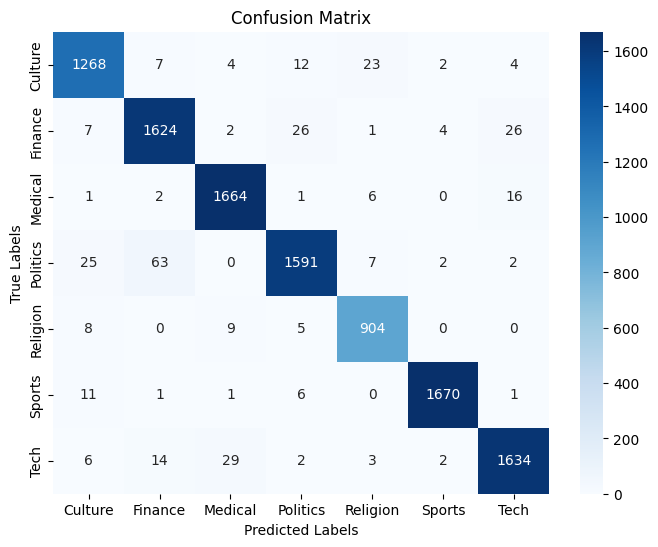

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(
    test_data["label"],  # True labels
    predicted_labels,  # Predicted labels
    labels=range(len(label_mapping))  # Integer range for classes
)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys(), cmap="Blues"
)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [66]:
# Example input texts
sample_texts = [
    "كيف تؤثر الرياضة على الصحة النفسية؟",
    "الأزمة الاقتصادية العالمية تتفاقم مع مرور الوقت.",
    "ما هو تأثير التدخين على القلب؟",
    "التطور التكنولوجي ساعد في تحسين التعليم عن بعد.",
    "هل يمكن أن تحقق الروبوتات تقدمًا في الطب؟",
    "النظام الغذائي الصحي يقلل من خطر الإصابة بالأمراض المزمنة.",
    "النزاعات السياسية تؤثر على الاستقرار الاقتصادي.",
    "هل الموسيقى يمكن أن تساعد على تقليل التوتر؟"
]

# Tokenize the inputs
sample_encodings = tokenizer(
    sample_texts, padding=True, truncation=True, max_length=64, return_tensors="pt"
).to("cuda")  # Move tensors to GPU

# Make predictions
outputs = model(**sample_encodings)
sample_predictions = outputs.logits.argmax(dim=1).cpu().numpy()

# Decode predictions to class names
decoded_sample_predictions = [list(label_mapping.keys())[label] for label in sample_predictions]

# Print results
for text, pred_label in zip(sample_texts, decoded_sample_predictions):
    print(f"Text: {text}")
    print(f"Predicted Label: {pred_label}")
    print("-" * 50)


Text: كيف تؤثر الرياضة على الصحة النفسية؟
Predicted Label: Medical
--------------------------------------------------
Text: الأزمة الاقتصادية العالمية تتفاقم مع مرور الوقت.
Predicted Label: Finance
--------------------------------------------------
Text: ما هو تأثير التدخين على القلب؟
Predicted Label: Medical
--------------------------------------------------
Text: التطور التكنولوجي ساعد في تحسين التعليم عن بعد.
Predicted Label: Tech
--------------------------------------------------
Text: هل يمكن أن تحقق الروبوتات تقدمًا في الطب؟
Predicted Label: Tech
--------------------------------------------------
Text: النظام الغذائي الصحي يقلل من خطر الإصابة بالأمراض المزمنة.
Predicted Label: Medical
--------------------------------------------------
Text: النزاعات السياسية تؤثر على الاستقرار الاقتصادي.
Predicted Label: Finance
--------------------------------------------------
Text: هل الموسيقى يمكن أن تساعد على تقليل التوتر؟
Predicted Label: Medical
--------------------------------------------

# Saving the model

In [61]:
# Saving the model and tokenizer
model.save_pretrained("/tmp/saved_model")
tokenizer.save_pretrained("/tmp/saved_model")
print("Model and tokenizer saved successfully.")


Model and tokenizer saved successfully.
